In [2]:
import sys
import torch, random
sys.path.append("..")
from federated_learning.helper import utils
from torchvision import transforms
from torchvision.datasets.vision import VisionDataset
from federated_learning.FLCustomDataset import FLCustomDataset
from federated_learning.AddGaussianNoise import AddGaussianNoise
from federated_learning.FLNet import FLNet
from torch.utils.data import DataLoader

In [2]:
class args_parser():
    def __init__(self):
        self.dataset = "mnist"
        self.iid = False
        self.unequal = False
        self.num_users = 100
        self.shards_num = 200
        self.shards_per_worker_num = 2
args = args_parser()

In [4]:
server_model = FLNet().to("cpu")
for ii, jj in server_model.state_dict().items():
    print(ii, jj.shape)
#     if ii == "conv1.bias":
#         print(jj)

conv1.weight torch.Size([20, 1, 5, 5])
conv1.bias torch.Size([20])
conv2.weight torch.Size([50, 20, 5, 5])
conv2.bias torch.Size([50])
fc1.weight torch.Size([500, 800])
fc1.bias torch.Size([500])
fc2.weight torch.Size([10, 500])
fc2.bias torch.Size([10])


In [22]:
def print_model(name, model):
    for ii, jj in model.named_parameters():
        if ii == "conv1.bias":
            print("{}: {}".format(name, jj.data[:7]))

In [5]:
aa = utils.normalize_weights({"server1": server_model.state_dict(), "server2": server_model.state_dict()})

In [6]:
len(aa)

2

In [6]:
for ii, jj in aa['server1'].items():
    print(ii, jj.shape)


conv1.weight torch.Size([1000, 1])
conv1.bias torch.Size([40, 1])
conv2.weight torch.Size([50000, 1])
conv2.bias torch.Size([100, 1])
fc1.weight torch.Size([800000, 1])
fc1.bias torch.Size([1000, 1])
fc2.weight torch.Size([10000, 1])
fc2.bias torch.Size([20, 1])


In [2]:
# args = args_parser()

train_dataset = utils.load_mnist_data_train()
# Now sort the dataset and distribute among users
# sorted_train_data = utils.sort_mnist_dataset(train_dataset)
# splitted_train_data = utils.split_dataset(
#     sorted_train_data, int(len(sorted_train_data) / args.shards_num))
# federated_train_datasets = utils.map_shards_to_worker(splitted_train_data, workers, args.shards_per_worker_num)

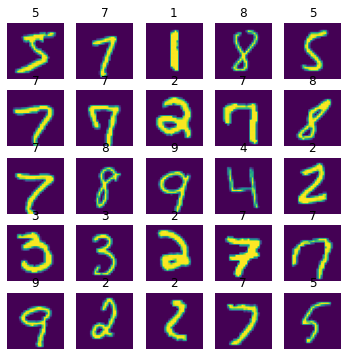

In [5]:
dd = DataLoader(train_dataset, batch_size=len(train_dataset.targets))
import matplotlib.pyplot as plt
for d1, t1 in dd:
    figure = plt.figure(figsize=(6,6))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.axis("off")
        plt.title(t1[i+i*i*95].item())
        plt.imshow(d1[i+i*i*95].view(28, 28))
    break

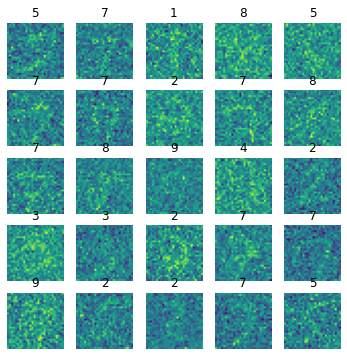

In [6]:
tt = FLCustomDataset(
    train_dataset.data, train_dataset.targets, transform=transforms.Compose([
        transforms.ToTensor(), AddGaussianNoise(0., 1.),]))
dd = DataLoader(tt, batch_size=len(tt.targets))
import matplotlib.pyplot as plt
for d1, t1 in dd:
    figure = plt.figure(figsize=(6,6))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.axis("off")
        plt.title(t1[i+i*i*95].item())
        plt.imshow(d1[i+i*i*95].view(28, 28))
    break

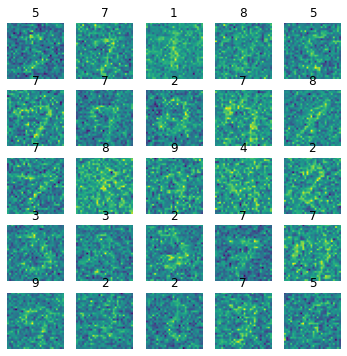

In [9]:
tt = FLCustomDataset(
    train_dataset.data, train_dataset.targets, transform=transforms.Compose([
        transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,)), AddGaussianNoise(0., 2.5),]))
dd = DataLoader(tt, batch_size=len(tt.targets))
import matplotlib.pyplot as plt
for d1, t1 in dd:
    figure = plt.figure(figsize=(6,6))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.axis("off")
        plt.title(t1[i+i*i*95].item())
        plt.imshow(d1[i+i*i*95].view(28, 28))
    break

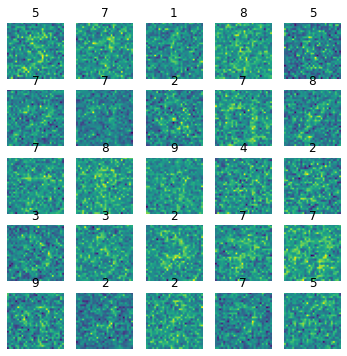

In [8]:
tt = FLCustomDataset(
    train_dataset.data, train_dataset.targets, transform=transforms.Compose([
        transforms.ToTensor(), AddGaussianNoise(0., 1.), transforms.Normalize((0.1307,), (0.3081,))]))
dd = DataLoader(tt, batch_size=len(tt.targets))
import matplotlib.pyplot as plt
for d1, t1 in dd:
    figure = plt.figure(figsize=(6,6))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.axis("off")
        plt.title(t1[i+i*i*95].item())
        plt.imshow(d1[i+i*i*95].view(28, 28))
    break
    